In [1]:
import torch
from torchzero.benchmarks.restoration import Restoration
from torchzero.optim import GradChain
from image_descent import ImageDescent

image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

# Gradient chaining
Gradient chaining means that after one optimizer updates parameters of the model, the update is undone and used as gradients for the next optimizer. One Adam is thus equivalent to a chain of Adam + SGD, where SGD will just apply the Adam's update; and equivalent to a chain of SGD + Adam, as SGD just subtracts the gradient, so the update equals to negative gradients.

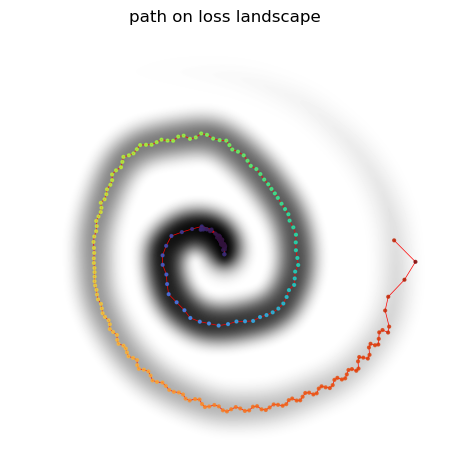

In [47]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = torch.optim.AdamW(descent.parameters(), 1e-1)
for i in range(1000):
    optimizer.zero_grad()
    descent.step()
    optimizer.step()
descent.plot_path()

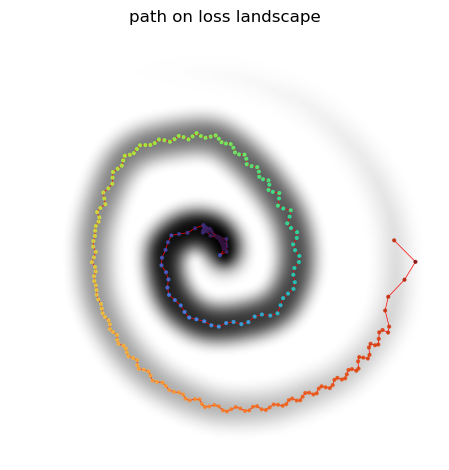

In [48]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = GradChain(
    list(descent.parameters()),
    [
        torch.optim.SGD(descent.parameters(), 1),
        torch.optim.AdamW(descent.parameters(), 1e-1),
    ],
)
for i in range(1000):
    optimizer.zero_grad()
    descent.step()
    optimizer.step()
descent.plot_path()

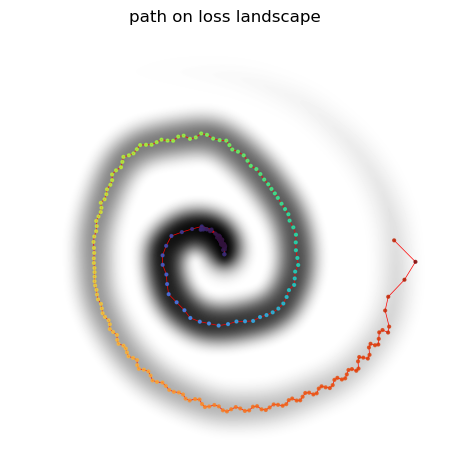

In [49]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = GradChain(
    list(descent.parameters()),
    [
        torch.optim.AdamW(descent.parameters(), 1e-1),
        torch.optim.SGD(descent.parameters(), 1),
    ],
)
for i in range(1000):
    optimizer.zero_grad()
    descent.step()
    optimizer.step()
descent.plot_path()

# Mixing
Just mixing optimizers doesn't tend to produce good results. However this may be useful for adding nesterov momentum to any optimizer by combining it with SGD with nesterov, like this:
```py
optimizer = GradChain(
    descent.parameters(),
    [
        MyNewSOTAOptimizer(descent.parameters(), 1e-5),
        torch.optim.SGD(descent.parameters(), 1, momentum = 0.9, nesterov=True),
    ],
)
```

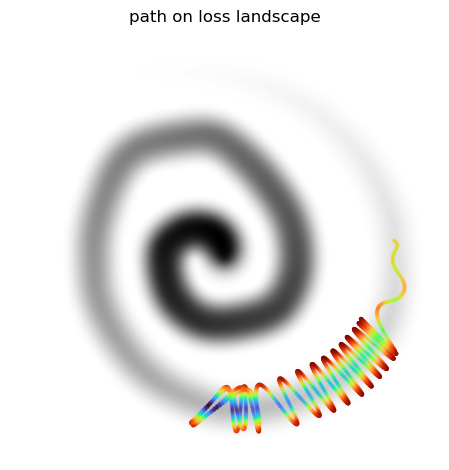

In [66]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = GradChain(
    descent.parameters(),
    [
        torch.optim.AdamW(descent.parameters(), 1e-5),
        torch.optim.AdamW(descent.parameters(), 1e-2),
    ],
)
for i in range(1000):
    optimizer.zero_grad()
    descent.step()
    optimizer.step()
descent.plot_path()

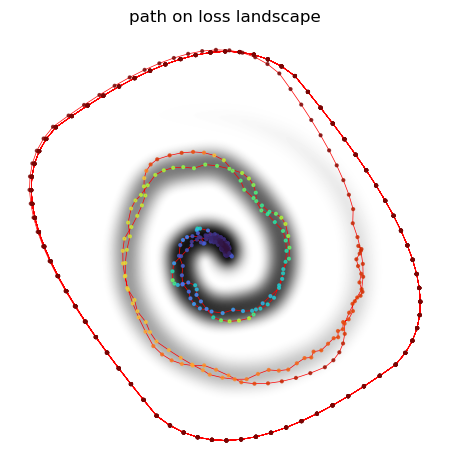

In [77]:
from stuff.found.torch.optim.Lion import Lion
descent = ImageDescent(image, coords=(915, 500))

optimizer = GradChain(
    list(descent.parameters()),
    [
        Lion(descent.parameters(), 1e-1),
        torch.optim.SGD(descent.parameters(), 1e-1, momentum=0.9, nesterov=True),
    ],
)
for i in range(1000):
    optimizer.zero_grad()
    descent.step()
    optimizer.step()
descent.plot_path()

This one is Lion optimizer from https://github.com/OpenMOSS/CoLLiE, but with 0.9 Nesterov momentum.
Not only did it complete a spiral perfectly, it also somehow managed to travel the spiral backwards and then started doing victory laps...

In [79]:
from stuff.found.torch.optim.Lion import Lion
descent = ImageDescent(image, coords=(915, 500))

optimizer = GradChain(
    list(descent.parameters()),
    [
        Lion(descent.parameters(), 1e-1),
        torch.optim.SGD(descent.parameters(), 1e-1, momentum=0.9, nesterov=True),
    ],
)
for i in range(1000):
    optimizer.zero_grad()
    descent.step()
    descent.animation_step()
    optimizer.step()
descent.to_html5_video(30)

Swapping Neserov and Lion, thus using Nesterov momentum as the gradient also seems to work quite fine

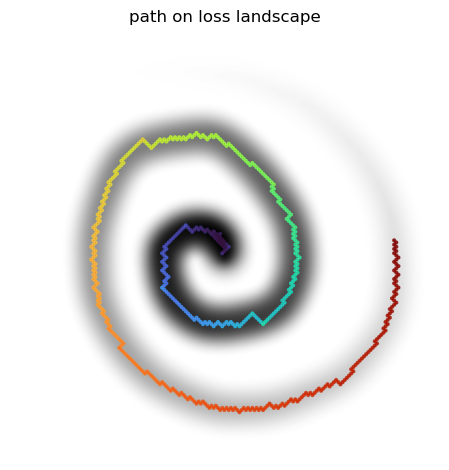

In [5]:
from stuff.found.torch.optim.Lion import Lion
descent = ImageDescent(image, coords=(915, 500))

optimizer = GradChain(
    list(descent.parameters()),
    [
        torch.optim.SGD(descent.parameters(), 1e-3, momentum=0.9, nesterov=True),
        Lion(descent.parameters(), 1e-2),
    ],
)
for i in range(1000):
    optimizer.zero_grad()
    descent.step()
    optimizer.step()
descent.plot_path()